In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from icecream import ic
from pathlib import Path
import random
from sklearn.model_selection import train_test_split
random.seed(21)

In [41]:
def calculate_vif_(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f"dropping {X.iloc[:, variables].columns[maxloc]} at index: {maxloc}")
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

## Preparing the first data set (Credit risk data)

In [44]:
df = pd.read_csv("credit-data.csv")
df.drop(["CUSTOMER_ID", "ASSESSMENT_YEAR"],axis = 1, inplace = True)
df.dropna(inplace = True) #drops 3 observations
df = pd.get_dummies(df, drop_first = True)
y1 = df.DEFAULT_FLAG.to_numpy()
X1 = df.drop("DEFAULT_FLAG", axis = 1).to_numpy()
#X1 = calculate_vif_(X1, thresh = 100)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = 21, stratify = y1)

In [51]:
X1.shape

(5801, 17)

In [5]:
Cancer = pd.read_csv("wdbc.data", header=None)
Cancer.iloc[:,1] = (Cancer[1] == "M").astype(int)
Cancer = Cancer.drop(columns=[0])
Y = Cancer[1].to_numpy()
X = Cancer.loc[:,2:]
X = calculate_vif_(X)
X = X.to_numpy()
X_normalized = (X - X.mean(0)) / X.std(0)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y)

dropping 2 at index: 0
dropping 22 at index: 19
dropping 4 at index: 1
dropping 24 at index: 19
dropping 11 at index: 7
dropping 26 at index: 19
dropping 23 at index: 17
dropping 31 at index: 22
dropping 30 at index: 21
dropping 8 at index: 4
dropping 12 at index: 6
dropping 29 at index: 18
dropping 6 at index: 2
dropping 7 at index: 2
dropping 5 at index: 1
dropping 27 at index: 13
dropping 14 at index: 4
dropping 10 at index: 2
dropping 3 at index: 0
dropping 19 at index: 6
dropping 17 at index: 4
dropping 25 at index: 7
dropping 9 at index: 0
dropping 20 at index: 4
dropping 21 at index: 4
dropping 16 at index: 2
Remaining variables:
Int64Index([13, 15, 18, 28], dtype='int64')


In [150]:
# add a dataset to test multiclass
df = pd.read_csv("Iris.csv")
df.drop("Id", axis = 1, inplace = True)
X = calculate_vif_(df.drop("Species", axis = 1, inplace = False)).to_numpy()
y = pd.get_dummies(df.Species, drop_first = False).to_numpy()
X_multi_train, X_multi_test, Y_multi_train, Y_multi_test = train_test_split(X, y, random_state=21)

dropping SepalLengthCm at index: 0
dropping PetalLengthCm at index: 1
Remaining variables:
Index(['SepalWidthCm', 'PetalWidthCm'], dtype='object')


In [34]:
from sklearn.model_selection import train_test_split
Cancer = pd.read_csv("wdbc.data", header=None)
Cancer.iloc[:,1] = (Cancer[1] == "M").astype(int)
Cancer = Cancer.drop(columns=[0])

array([[9.053e-01, 1.534e+02, 5.373e-02, 7.119e-01],
       [7.339e-01, 7.408e+01, 1.860e-02, 2.416e-01],
       [7.869e-01, 9.403e+01, 3.832e-02, 4.504e-01],
       ...,
       [1.075e+00, 4.855e+01, 4.730e-02, 3.403e-01],
       [1.595e+00, 8.622e+01, 7.117e-02, 9.387e-01],
       [1.428e+00, 1.915e+01, 0.000e+00, 0.000e+00]])

In [151]:
path = Path("../Labs/lab2_logistic_regression/SAheart.data")
df = pd.read_csv(path, sep = ",")
df = df.drop("row.names", axis = 1)
df["famhist_present"] = pd.get_dummies(df.famhist)["Present"] # famhist can be: present | absent
df.drop("famhist", axis = 1, inplace = True)

X = df.drop("chd", axis = 1, inplace=False).to_numpy()
y = df.chd.to_numpy()

In [3]:
df = pd.read_csv("data.simple.test.10000.csv")
df["predict"] = pd.get_dummies(df.cls, drop_first = True)
df.drop("cls", axis = 1, inplace = True)

X = df.drop("predict", axis = 1, inplace = False).to_numpy()
y = df.predict.to_numpy()

In [74]:
#multiclass
df = pd.read_csv("Iris.csv")
df.drop("Id", axis = 1, inplace = True)
X = df.drop("Species", axis = 1, inplace = False).to_numpy()
y = pd.get_dummies(df.Species, drop_first = False).to_numpy()


In [183]:
a = np.random.normal(loc = 5, size = (4,1))
X = np.random.normal(size = (4,4))

In [198]:
a * X

array([[ -4.04974479,  -4.18799392,  -3.29439688,   6.8390388 ],
       [  1.0370668 ,   1.07695354,   1.70801861,  -9.02168428],
       [ -8.23941684,   1.76495676,   2.76678308,  -2.66326346],
       [-15.97538503,  -3.11095196,  -7.4652715 ,   1.45880529]])

In [186]:
a

array([[5.41000668],
       [5.17813934],
       [6.18265834],
       [5.79558743]])

In [75]:
df = make_classification(n_samples=100, n_features=20, n_informative = 2,
                         n_redundant = 1 , n_repeated=0, n_classes=2, n_clusters_per_class = 2)
X = df[0]
y = df[1]

In [31]:
from scipy.special import expit


class logit():
    def __init__(self, exog, endog, add_intercept = True):
        if len(endog.shape) > 1:
            self.y = endog # T x 1
        elif len(endog.shape) == 1:
            self.y = endog.reshape(-1,1)
        if add_intercept == True:
            self.X = np.concatenate((np.ones(shape = (exog.shape[0], 1)), exog), axis = 1) # T x k
        elif add_intercept == False:
            self.X = exog
        #self.b = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y # k x 1, initialized with LS estimator
        if self.y.shape[1] == 1:
            self.b = np.random.normal(size = (self.X.shape[1],1))
            self.multiclass = 0
        elif self.y.shape[1] > 1:# b - k x J (where J - number or classes)
            self.b = np.random.normal(size = (self.X.shape[1], self.y.shape[1]))
            self.multiclass = 1
            

    
    def sigmoid(x): # returns output with the same dimensions as x 
        return 1 / (1 + np.exp(-x))
    
    def cross_entrophy(y_true, y_pred): #returns a scalar value
        # epsilon = 1e-5 ? why?
        return -np.sum(y_true * np.log(y_pred, out=np.zeros_like(y_pred), where=(y_pred!=0)) + (1 - y_true) * np.log(1 - y_pred, out=np.zeros_like(1-y_pred), where=(1-y_pred!=0)))
    
    def cross_entrophy_der(X, y, b): # returns X.shape[0] x k vector 
        p_hat = logit.sigmoid(X @ b) # T x 1
        return X * (p_hat - y)  # X.shape[0] x k
    """
    def softmax(X, b):
        return np.exp(X @ b) / np.sum(np.exp(X @ b))
    """
    def softmax(x):
        # Compute softmax values for each sets of scores in x.
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis = 0)
    
    def loglikelihood_multiclass(X, y, b):
        # X - T x k
        # y - T x J
        # b - k x J
        return np.sum(((X @ b) * y)[:,:-1]) - np.sum(np.log(1 + np.sum(np.exp(X @ b[:,:-1]), axis = 1)))
                                                   
    def loglikelihood_multiclass_der(X, y, b):
        # X - T x k
        # y - T x J
        # b - k x J
        return X.T @ (y - logit.softmax(X @ b))[:,:-1]
        
    
    
    
    def predict_proba(self, X): # returns X.shape[0] x 1 vector
        if self.multiclass == 1:
            return logit.softmax(X @ self.b)
        else:
            return logit.sigmoid(X @ self.b)
        
    def predict_y(self, X, threshold = 0.5): # returns X.shape[0] x 1 vector
        p_hat = 1 / (1 + np.exp( - X @ self.b))
        if self.multiclass==0:
            return np.array([1 if i[0] > threshold else 0 for i in p_hat]).reshape(-1,1)
        else:
            results = np.zeros(shape=p_hat.shape)
            for i in range(0, len(p_hat)):
                results[i][np.argmax(p_hat[i])] = 1
            return results
    
    
    def accuracy(self, X, y):
        y_hat = logit.predict_y(self, X)
        truths = y_hat == y
        ts = [np.prod(t) for t in truths]
        correct_num = np.sum(ts)
        return correct_num / X.shape[0]

    def recall(self, X, y):
        y_hat = logit.predict_y(self, X)
        if not self.multiclass:
            same = y[y_hat == y]
            true_positives = np.sum(same[same == 1])
            different = y[y_hat != y]
            false_negatives = np.sum(different[different == 1])
        else:
            true_positives = 0
            false_negatives = 0
            truths = y_hat == y
            ts = [np.prod(t) for t in truths]
            same = y[ts]
            fs = [not np.prod(t) for t in truths]
            different = y[fs]
            for i in range(0, self.y.shape[1]):
                mask = np.zeros(shape=(self.y.shape[1]))
                mask[i] = 1
                true_positives += np.sum(same[same == mask])
                false_negatives += np.sum(different[different == mask])
        return true_positives/(false_negatives+true_positives)
    
    def precision(self, X, y):
        y_hat = logit.predict_y(self, X)
        if not self.multiclass:
            same = y[y_hat == y]
            true_positives = np.sum(same[same == 1])
            different = y_hat[y_hat != y]
            false_positives = np.sum(different[different == 1])
        else:
            true_positives = 0
            false_positives = 0
            truths = y_hat == y
            ts = [np.prod(t) for t in truths]
            same = y[ts]
            fs = [not np.prod(t) for t in truths]
            different = y_hat[fs]
            for i in range(0, self.y.shape[1]):
                mask = np.zeros(shape=(self.y.shape[1]))
                mask[i] = 1
                true_positives += np.sum(same[same == mask])
                false_positives += np.sum(different[different == mask])
        return true_positives/(false_positives+true_positives)
    
    def f_measure(self, X, y):
        precision = self.precision(X, y)
        recall = self.recall(X, y)
        return 2 * ( precision * recall) / (precision + recall)
    
    
    def fit(self, stop_condition = 0.001, lr = 0.001, method = "GD", verbose = False,
           max_iter = 300):
        # list with losses obtained when running the learing process
        loss = []
        betas = []
        # p - vector of probabilities, shape T x 1
        p = logit.sigmoid(self.X @ self.b)
        loss.append(logit.cross_entrophy(self.y, p))
        betas.append(self.b)
        # condtion (when satisfied algorithm will stop)
        cond = 1
        # iteration counter
        i = 1
        
        
        while cond > stop_condition and i < max_iter:
            
            if method == "GD":
                if self.multiclass == 1:
                    gradient = logit.loglikelihood_multiclass_der(self.X, self.y, self.b) / X.shape[0]
                    print(gradient.shape, self.y.shape)
                    gradient = np.append(gradient, np.zeros(shape = (gradient.shape[0],1)), axis = 1)  
                else:
                    gradient = np.mean(logit.cross_entrophy_der(self.X, self.y, self.b), axis = 0).reshape(-1,1)
                    
                # updating weights
                beta_old = self.b
                self.b = beta_old - lr * gradient
                betas.append(self.b)
                
                # update the value of condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                #print(cond)

                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                if self.multiclass == 1:
                    loss.append(logit.loglikelihood_multiclass(self.X, self.y, self.b))
                else:
                    loss.append(logit.cross_entrophy(self.y, p))
                    
            
            elif method == "SGD":
                for j in range(self.X.shape[0]):
                    gradient = logit.cross_entrophy_der(self.X[j,:].reshape(1,-1), self.y[j,:], self.b).reshape(-1,1)
                    beta_old = self.b
                    self.b = beta_old - lr * gradient
                    cond = np.max(np.abs((beta_old - self.b) / beta_old))
                    
                    # loss function after one calculation
                    betas.append(self.b)       
                    p = logit.sigmoid(self.X @ self.b)
                    loss.append(logit.cross_entrophy(self.y, p))
                    
                    if cond < stop_condition:
                        print("Breaking")
                        break
                print(cond)
                    
                    

            elif method == "IRLS":                       
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                # diagonal T x T matrix with values "p_i * (1-p_i)" on the diagonal
                W = np.diag(np.diag(p @ (1 - p).T)) 
                # T x 1 wector of transformed response variable
                z = self.X @ self.b + np.linalg.inv(W) @ (self.y - p)
                
                # updating beta 
                beta_old = self.b
                self.b = np.linalg.inv(self.X.T @ W @ self.X) @ self.X.T @ W @ z
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
            elif method == "IRLS2":
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                W = p * (1 - p)# vector
 
                # T x 1 wector of transformed response variable
                z = self.X @ self.b + (1 / W) * (self.y - p)
                X_temp = W * self.X
                # updating beta 
                beta_old = self.b
                self.b = np.linalg.inv(self.X.T @ X_temp) @ X_temp.T @ z
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
            elif method == "IRLS3":
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                W = p * (1 - p)# vector
                X_temp = W * self.X
                beta_old = self.b
                self.b = self.b + np.linalg.inv(self.X.T @ X_temp) @ self.X.T @ (self.y - p)
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
                
                
            if verbose == True:
                print("iteration", i, "loss function value =", loss[-1])
                
            i+=1
            

        #print(cond)
        return loss, betas
    

In [34]:
#np.seterr(divide='ignore', invalid='ignore')
model1 = logit(X, y ,add_intercept = True)
loss1, betas1 = model1.fit(method = "GD", verbose = True, max_iter = 140, lr = 0.05, stop_condition = 0.00001 )
print("GD accuracy:", model1.accuracy(model1.X, model1.y))
print("GD recall:", model1.recall(model1.X, model1.y))
print("GD precision:", model1.precision(model1.X, model1.y))
print("GD F measure:", model1.f_measure(model1.X, model1.y))

#print(betas1[-1])

iteration 1 loss function value = 7207.808854742617
iteration 2 loss function value = 7160.083708608063
iteration 3 loss function value = 7113.009956846774
iteration 4 loss function value = 7066.580398068734
iteration 5 loss function value = 7020.787784965553
iteration 6 loss function value = 6975.624830078514
iteration 7 loss function value = 6931.084211449793
iteration 8 loss function value = 6887.158578150477
iteration 9 loss function value = 6843.840555679584
iteration 10 loss function value = 6801.122751228897
iteration 11 loss function value = 6758.997758808973
iteration 12 loss function value = 6717.458164232257
iteration 13 loss function value = 6676.496549949748
iteration 14 loss function value = 6636.105499738275
iteration 15 loss function value = 6596.277603235843
iteration 16 loss function value = 6557.005460323108
iteration 17 loss function value = 6518.281685349457
iteration 18 loss function value = 6480.098911202645
iteration 19 loss function value = 6442.44979322138
ite

In [33]:
model2 = logit(X1_train, y1_train ,add_intercept = True)
loss2, betas2 = model2.fit(method = "SGD", verbose = True, max_iter = 100, lr = 0.01, stop_condition = 0.00000001)
print("SGD accuracy:", model2.accuracy(model2.X, model2.y))
print("SGD recall:", model2.recall(model2.X, model2.y))
print("SGD precision:", model2.precision(model2.X, model2.y))
print("SGD F measure:", model2.f_measure(model2.X, model2.y))

NameError: name 'X1_train' is not defined

In [38]:
model3 = logit(X, y, add_intercept = True)
loss3, betas3 = model3.fit(method = "IRLS", verbose = True, max_iter = 10, lr = 0.01, stop_condition = 0.0001)
print("IRLS accuracy:", model3.accuracy(model3.X, model3.y))
print("IRLS recall:", model3.recall(model3.X, model3.y))
print("IRLS precision:", model3.precision(model3.X, model3.y))
print("IRLS F measure:", model3.f_measure(model3.X, model3.y))

KeyboardInterrupt: 

In [46]:
model3.X

array([[ 1., 60., 70., ...,  0.,  1.,  0.],
       [ 1., 50., 55., ...,  0.,  0.,  0.],
       [ 1., 50., 60., ...,  1.,  0.,  0.],
       ...,
       [ 1., 50., 50., ...,  0.,  0.,  1.],
       [ 1., 53., 60., ...,  0.,  1.,  0.],
       [ 1., 70., 65., ...,  0.,  0.,  0.]])

In [47]:
model3 = logit(X1_train, y1_train, add_intercept = True)
loss3, betas3 = model3.fit(method = "IRLS3", verbose = True, max_iter = 10, lr = 0.01, stop_condition = 0.0001)
print("IRLS accuracy:", model3.accuracy(model3.X, model3.y))
print("IRLS recall:", model3.recall(model3.X, model3.y))
print("IRLS precision:", model3.precision(model3.X, model3.y))
print("IRLS F measure:", model3.f_measure(model3.X, model3.y))

c:\users\mmarz\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


LinAlgError: Singular matrix

In [214]:
#np.seterr(divide='ignore', invalid='ignore')
model_multi_1 = logit(X_multi_train, Y_multi_train ,add_intercept = True)
loss_multi_1, betas_multi_1 = model_multi_1.fit(method = "GD", verbose = True, max_iter = 40, lr = 0.005, stop_condition = 0.00001 )
print("GD accuracy:", model_multi_1.accuracy(model_multi_1.X, model_multi_1.y))
print("GD recall:", model_multi_1.recall(model_multi_1.X, model_multi_1.y))
print("GD precision:", model_multi_1.precision(model_multi_1.X, model_multi_1.y))
print("GD F measure:", model_multi_1.f_measure(model_multi_1.X, model_multi_1.y))

#print(betas1[-1])

(3, 2) (112, 3)
0.004244812608449361
iteration 1 loss function value = -263.3469319750888
(3, 2) (112, 3)
0.004226889136442209
iteration 2 loss function value = -264.2262490049628
(3, 2) (112, 3)
0.004209116464545004
iteration 3 loss function value = -265.1072253545466
(3, 2) (112, 3)
0.004191492697569943
iteration 4 loss function value = -265.9898434061578
(3, 2) (112, 3)
0.004174015971953638
iteration 5 loss function value = -266.8740856882573
(3, 2) (112, 3)
0.004156684455101067
iteration 6 loss function value = -267.75993487525653
(3, 2) (112, 3)
0.004139496344743989
iteration 7 loss function value = -268.6473737872956
(3, 2) (112, 3)
0.004122449868317153
iteration 8 loss function value = -269.5363853899944
(3, 2) (112, 3)
0.0041055432823481775
iteration 9 loss function value = -270.426952794176
(3, 2) (112, 3)
0.004088774871863595
iteration 10 loss function value = -271.31905925556396
(3, 2) (112, 3)
0.004072142949808557
iteration 11 loss function value = -272.21268817445394
(3, 2

In [215]:
model_multi_2 = logit(X_multi_train, Y_multi_train ,add_intercept = True)
loss_multi_2, betas_multi_2 = model_multi_2.fit(method = "SGD", verbose = True, max_iter = 100, lr = 0.01, stop_condition = 0.00000001)
print("SGD accuracy:", model_multi_2.accuracy(model_multi_2.X, model_multi_2.y))
print("SGD recall:", model_multi_2.recall(model_multi_2.X, model_multi_2.y))
print("SGD precision:", model_multi_2.precision(model_multi_1.X, model_multi_1.y))
print("SGD F measure:", model_multi_2.f_measure(model_multi_1.X, model_multi_1.y))

0.00804212519196098
iteration 1 loss function value = 268.8023273107559
0.004529089670992998
iteration 2 loss function value = 278.10332740716893
0.002324101306026164
iteration 3 loss function value = 287.9303580854822
0.001408790515726595
iteration 4 loss function value = 299.9770255390786
0.001719435736246789
iteration 5 loss function value = 315.8695593564507
0.002015141619160097
iteration 6 loss function value = 334.87921210321304
0.002222443230319943
iteration 7 loss function value = 355.8502264416003
0.0023199370332149913
iteration 8 loss function value = 377.76818270800186
0.002328100914976225
iteration 9 loss function value = 399.93112900849906
0.002280330391739303
iteration 10 loss function value = 421.9174387745422
0.002204243754711037
iteration 11 loss function value = 443.49803544160875
0.0021173798769184727
iteration 12 loss function value = 464.5603643749671
0.0020293312310508353
iteration 13 loss function value = 485.05788608736543
0.001944774393991593
iteration 14 loss 

In [42]:
model2.X.shape

(426, 5)

In [118]:
y1_train.mean()

0.09816091954022989

In [119]:
y1_test.mean()

0.09028256374913853

In [43]:
betas2[-1].reshape(1,-1)[:,1:]

array([[ 1.12697804,  1.8836361 ,  0.53816435, -1.15908311]])

In [149]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "lbfgs", fit_intercept=True, max_iter=1000)
model.fit(X1_train, y1_train)
print(model.score(X1_train, y1_train))
model.coef_

0.9038793103448276


array([[-1.92093266e-12, -1.88008283e-12, -1.86066965e-12,
        -1.73261110e-12, -1.86054453e-12, -1.80848485e-12,
        -1.23179421e-14, -1.14656623e-07, -2.63900412e-16,
         1.18071756e-16, -7.73609476e-16, -1.31709861e-14,
        -1.67427823e-15, -9.21501045e-16,  1.63446256e-15,
        -7.53259397e-15, -2.06003973e-15]])

In [145]:
from statsmodels.discrete.discrete_model import Logit

#X = df.drop("chd", axis = 1, inplace=False)
#y = df.chd

model = Logit(endog = y1_train, exog = X1_train)
res = model.fit()
np.sum((res.predict(X1_train) > 0.5) == y1_train) / X1_train.shape[0]

Optimization terminated successfully.
         Current function value: 0.199986
         Iterations 9


0.9206896551724137

In [56]:
X.shape

(569, 4)

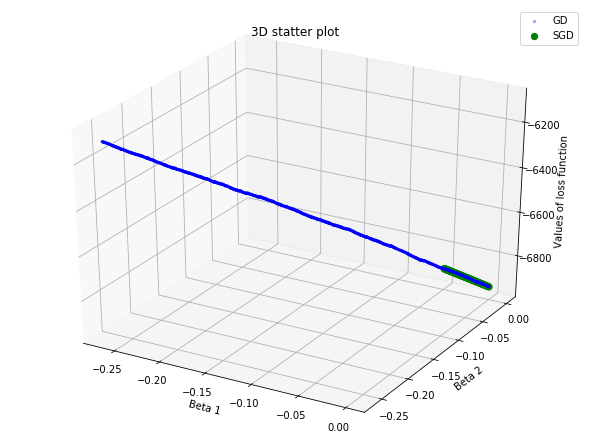

In [126]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,6))
ax = Axes3D(fig)

sequence_containing_x_vals1 = [i[0][0] for i in betas1]
sequence_containing_y_vals1 = [i[1][0] for i in betas1]
sequence_containing_z_vals1 = loss1

sequence_containing_x_vals2 = [i[0][0] for i in betas2]
sequence_containing_y_vals2 = [i[1][0] for i in betas2]
sequence_containing_z_vals2 = loss2


ax.scatter(sequence_containing_x_vals2, sequence_containing_y_vals2, sequence_containing_z_vals2, marker = "o",
          color = "blue", s = 5, alpha =0.3)
ax.scatter(sequence_containing_x_vals1, sequence_containing_y_vals1, sequence_containing_z_vals1, marker = "o",
          color = "green", s = 40)

plt.title("3D statter plot")
ax.set_xlabel("Beta 1")
ax.set_ylabel("Beta 2")
ax.set_zlabel("Values of loss function")
plt.legend(["GD", "SGD"])
plt.show()